In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# K-means

In [2]:
mat = loadmat("ex7data2.mat")
X = mat["X"]
# each example in X in R2

In [6]:
def findClosetsCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:]-centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

In [7]:
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosetsCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples:\n',idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


In [8]:
# update centroids

def computeCentroids(X, idx,K):
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:] += X[i,:]
        count[index] +=1
    
    return centroids/count


In [21]:
def plotKmeans(X, centroids, idx, n_iter,K):
    
    m,n = X.shape[0],X.shape[1]
    
    fig,ax = plt.subplots(nrows= n_iter,ncols= 1, figsize=(6,36))
    
    for i in range(n_iter):
        color = 'rgb'
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1], c=color[k-1], s=15 )
        
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120, marker="x",c='black', linewidth=3)
        title = "Number of iterations"+str(i)
        ax[i].set_title(title)
        
        centroids = computeCentroids(X, idx, K)
        
        idx = findClosetsCentroids(X,centroids)
        
    plt.tight_layout()

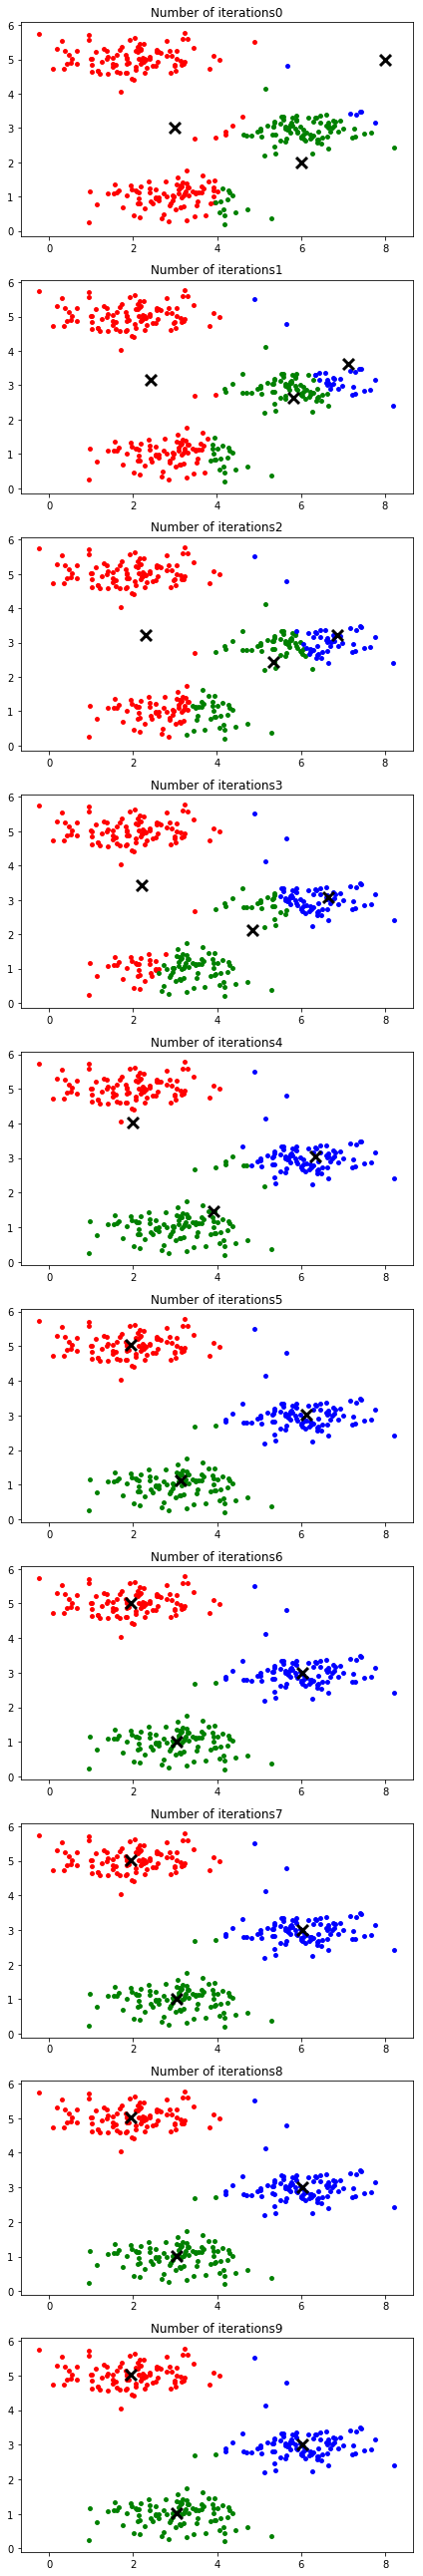

In [22]:
m,n = X.shape[0],X.shape[1]

plotKmeans(X, initial_centroids, idx,10, K)

In [24]:
#random initial centroids
def KmeansInitCentroids(X,K):
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
    
    return centroids

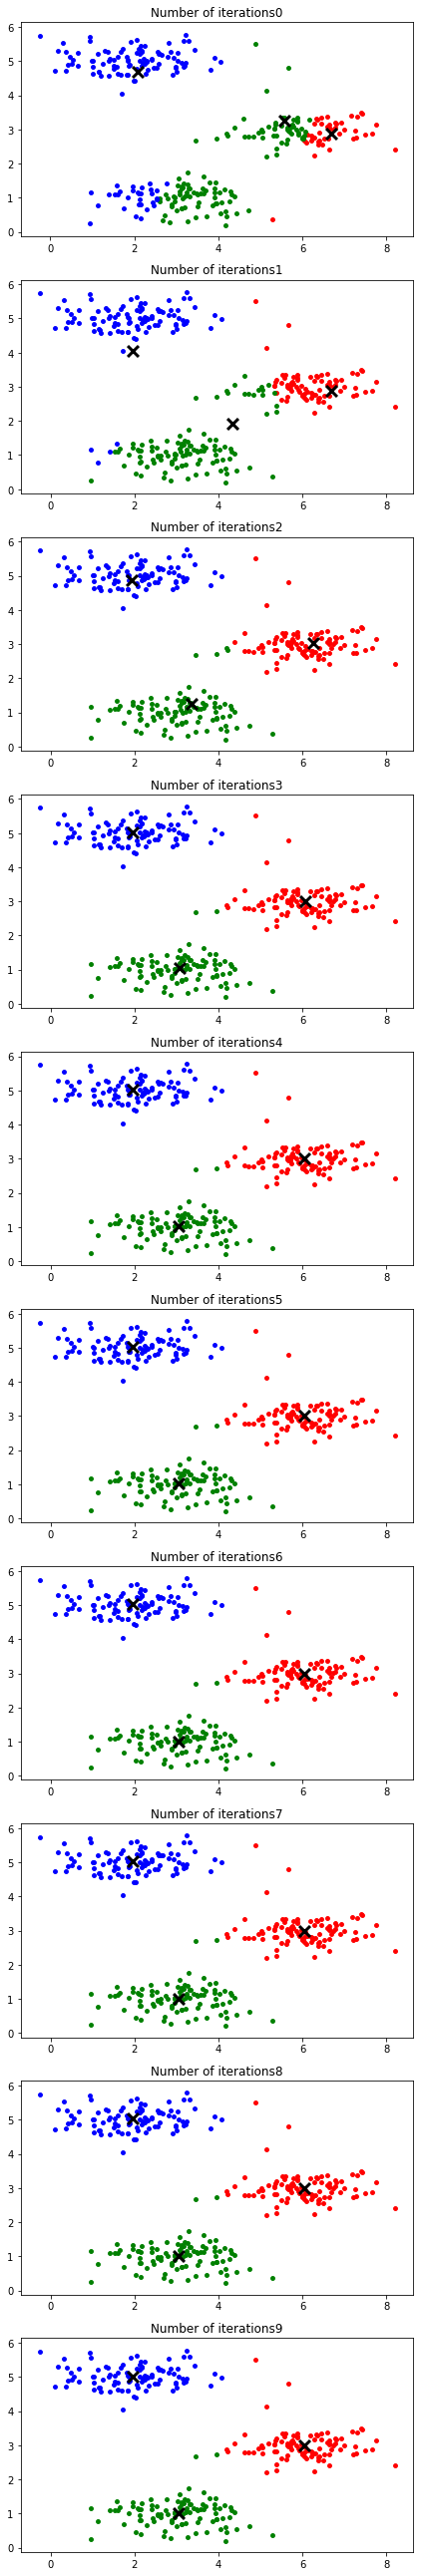

In [26]:
K=3
n_iter = 10
centroids =  KmeansInitCentroids(X,K)
idx = findClosetsCentroids(X,centroids)
plotKmeans(X,centroids, idx, n_iter,K)

# Principal components analysis 

In [27]:
mat3 = loadmat("ex7data1.mat")
X3 = mat3["X"]
# X3 in R2

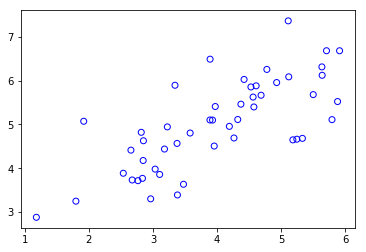

In [30]:
plt.scatter(X3[:,0],X3[:,1], marker='o', facecolors='none', edgecolors ='blue')

In [31]:
# normalize

def featureNormalize(X):
    #axis=0 means by column
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X-mu)/sigma
    
    return X_norm,mu,sigma

In [32]:
from numpy.linalg import svd

In [37]:
def PCA(X):
    m,n = X.shape[0],X.shape[1]
    
    sigma = (1/m)*X.T@X
    U,S,V=svd(sigma)
    return U,S,V

In [39]:
X_norm,mu,std = featureNormalize(X3)
U,S = PCA(X_norm)[:2]

(2, 8)

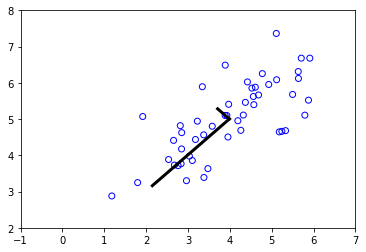

In [44]:
plt.scatter(X3[:,0],X3[:,1], marker ='o', facecolors='none',edgecolors='blue')
#Plotting eigenvectors, we add mu, because we subtracted when we normalized
#1.5 sigma both sides, because between 3sigma there is located the 95% of data
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]], [mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color='black',linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]], [mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color='black',linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [46]:
print('Principal Eigenvector ',U[:,0])

Principal Eigenvector  [-0.70710678 -0.70710678]


In [50]:
def projectData(X,U,K):
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j]=X[i,:] @ U_reduced[:,j]
            
    return Z

In [51]:
K=1
Z= projectData(X_norm,U,K)
print('Projection of first example:',Z[0][0])

Projection of first example: 1.4963126084578517


In [71]:
# Recover data

def recoverData(Z,U,K):
    m,n = Z.shape[0],U.shape[1]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:]@U_reduced.T
        
    return X_rec

In [72]:
X_rec = recoverData(Z,U,K)
print('Approximation of first example:',X_rec[0,:])

Approximation of first example: [-1.05805279 -1.05805279]


Text(0.5, 1.0, 'Normalized data and projection after PCA')

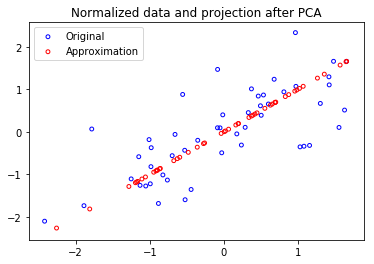

In [80]:
# Need to use the same marker

plt.scatter(X_norm[:,0],X_norm[:,1], marker ='o', label='Original', facecolors='none',edgecolors='b',s=15)
plt.scatter(X_rec[:,0],X_rec[:,1], marker ='o', label='Approximation', facecolors='none',edgecolors='r',s=15)
plt.legend()
plt.title('Normalized data and projection after PCA')